In [1]:
# importing data manipulation packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import string
from collections import Counter
import time

In [2]:
# importing plotting visualisation packages
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# models packages
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
# feature engineering, model selection packages
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, precision_score,recall_score,f1_score, roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score

In [5]:
# training data
df_train = pd.read_csv('Loandata_train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0,No
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0,No
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0,No
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0,Yes
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0,No


In [6]:
df_train.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
189,LP002793,Male,Yes,0,Graduate,No,15000.0,0.0,40000.0,6000,Rural,54600.0,HomeImp,ProfExe,4.0,0.0,19.0,6002.666667,36.0,No
190,LP002802,Male,No,0,Graduate,Yes,8666.0,4983.0,18793.0,6000,Rural,27750.0,HomeImp,Mgr,6.0,0.0,8.0,10985.168590,60.0,No
191,LP002803,Male,Yes,1,Not Graduate,No,4917.0,0.0,179397.0,6000,Rural,200000.0,DebtCon,ProfExe,5.0,6.0,29.0,6036.485052,36.0,No
192,LP002806,Male,Yes,3+,Graduate,No,4333.0,2451.0,79046.0,6000,Urban,103048.0,HomeImp,Other,0.0,0.0,32.0,8469.242788,36.0,Yes
193,LP002825,Male,Yes,3+,Graduate,No,2935.0,0.0,129731.0,6000,Semiurban,154113.0,HomeImp,ProfExe,12.0,0.0,19.0,6044.201363,36.0,Yes
194,LP002826,Female,Yes,1,Not Graduate,No,2833.0,0.0,48500.0,6100,Urban,62500.0,DebtCon,Mgr,7.0,2.0,11.0,6117.119661,36.0,Yes
195,LP002849,Male,Yes,0,Graduate,Yes,9833.0,1833.0,91704.0,6100,Urban,114799.0,HomeImp,Office,22.0,1.0,12.0,7942.326147,36.0,Yes
196,LP002850,Male,No,2,Graduate,Yes,5503.0,4490.0,47604.0,6100,Semiurban,54966.0,HomeImp,Other,5.0,0.0,18.0,10598.650554,36.0,Yes
197,LP002856,Male,Yes,0,Graduate,Yes,2500.0,4600.0,62751.0,6100,Rural,95617.0,HomeImp,Other,1.0,1.0,13.0,10725.100400,36.0,No
198,LP002858,Female,No,0,Graduate,No,4160.0,0.0,68743.0,6100,Semiurban,65321.0,HomeImp,Sales,3.0,0.0,22.0,6116.524760,36.0,Yes


In [7]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0,No
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0,No
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0,No
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0,Yes
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LP002932,Male,Yes,3+,Graduate,No,3813.0,0.0,73881.0,6200,Urban,98550.0,HomeImp,Other,0.0,0.0,31.0,6219.376082,36.0,Yes
205,LP002962,Male,No,0,Graduate,No,5167.0,3167.0,133882.0,6200,Semiurban,155222.0,HomeImp,ProfExe,9.0,0.0,19.0,9392.910973,36.0,Yes
206,LP002965,Female,Yes,0,Graduate,No,4723.0,0.0,75623.0,6200,Semiurban,89634.0,HomeImp,Other,24.0,0.0,47.0,6216.011645,36.0,Yes
207,LP002971,Male,Yes,3+,Not Graduate,No,4750.0,2333.0,99469.0,6300,Urban,116260.0,HomeImp,Office,23.0,1.0,12.0,8653.940842,36.0,Yes


In [8]:
df_train.JOB.value_counts()

Other      92
ProfExe    44
Office     31
Mgr        27
Sales      13
Self        2
Name: JOB, dtype: int64

In [9]:
# testing data
df_test = pd.read_csv('Loandata_test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0


In [10]:
#combining the data for analysis
frame = [df_train, df_test]
df1 = pd.concat(frame)

In [11]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0,No
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0,No
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0,No
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0,Yes
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LP002932,Male,Yes,3+,Graduate,No,3813.0,0.0,73881.0,6200,Urban,98550.0,HomeImp,Other,0.0,0.0,31.0,6219.376082,36.0,NaN
205,LP002962,Male,No,0,Graduate,No,5167.0,3167.0,133882.0,6200,Semiurban,155222.0,HomeImp,ProfExe,9.0,0.0,19.0,9392.910973,36.0,NaN
206,LP002965,Female,Yes,0,Graduate,No,4723.0,0.0,75623.0,6200,Semiurban,89634.0,HomeImp,Other,24.0,0.0,47.0,6216.011645,36.0,NaN
207,LP002971,Male,Yes,3+,Not Graduate,No,4750.0,2333.0,99469.0,6300,Urban,116260.0,HomeImp,Office,23.0,1.0,12.0,8653.940842,36.0,NaN


In [12]:
# data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 208
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                418 non-null    object 
 1   Gender                 418 non-null    object 
 2   Married                418 non-null    object 
 3   Dependents             418 non-null    object 
 4   Education              418 non-null    object 
 5   Self_Employed          418 non-null    object 
 6   ApplicantIncome        418 non-null    float64
 7   CoapplicantIncome      418 non-null    float64
 8   Mortgage Due           418 non-null    float64
 9   Loan Amount            418 non-null    int64  
 10  Property_Area          418 non-null    object 
 11  Property Value         418 non-null    float64
 12  Purpose                418 non-null    object 
 13  JOB                    418 non-null    object 
 14  No.of Years in Job     418 non-null    float64
 15  No.of 

In [13]:
#missing values
df1.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
Mortgage Due               0
Loan Amount                0
Property_Area              0
Property Value             0
Purpose                    0
JOB                        0
No.of Years in Job         0
No.of Credit enquires      0
No.of credit Lines         0
Debit to Income ratio      0
Loan term in Months        0
Loan Status              209
dtype: int64

In [14]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LP002932,Male,Yes,3+,Graduate,No,3813.0,0.0,73881.0,6200,Urban,98550.0,HomeImp,Other,0.0,0.0,31.0,6219.376082,36.0
205,LP002962,Male,No,0,Graduate,No,5167.0,3167.0,133882.0,6200,Semiurban,155222.0,HomeImp,ProfExe,9.0,0.0,19.0,9392.910973,36.0
206,LP002965,Female,Yes,0,Graduate,No,4723.0,0.0,75623.0,6200,Semiurban,89634.0,HomeImp,Other,24.0,0.0,47.0,6216.011645,36.0
207,LP002971,Male,Yes,3+,Not Graduate,No,4750.0,2333.0,99469.0,6300,Urban,116260.0,HomeImp,Office,23.0,1.0,12.0,8653.940842,36.0


In [15]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property Value,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,4839.550239,1645.013397,58149.234450,4632.057416,73840.241005,7.793780,0.971292,18.392344,6294.784192,35.248804
std,3797.752089,1938.730476,28976.746788,1224.421400,31686.409758,6.860478,1.608014,8.979632,2280.583834,6.455120
min,150.000000,0.000000,4000.000000,1100.000000,16020.000000,0.000000,0.000000,0.000000,1104.421269,18.000000
25%,2799.000000,0.000000,37000.000000,3900.000000,52000.000000,3.000000,0.000000,12.000000,4912.105594,36.000000
50%,3813.000000,1447.000000,58400.000000,5000.000000,70500.000000,6.000000,0.000000,17.000000,6019.626312,36.000000
75%,5500.000000,2451.000000,74172.000000,5600.000000,88000.000000,10.000000,1.000000,25.000000,7710.386560,36.000000
max,33846.000000,11300.000000,179397.000000,6300.000000,200000.000000,31.000000,10.000000,47.000000,16310.859318,84.000000


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

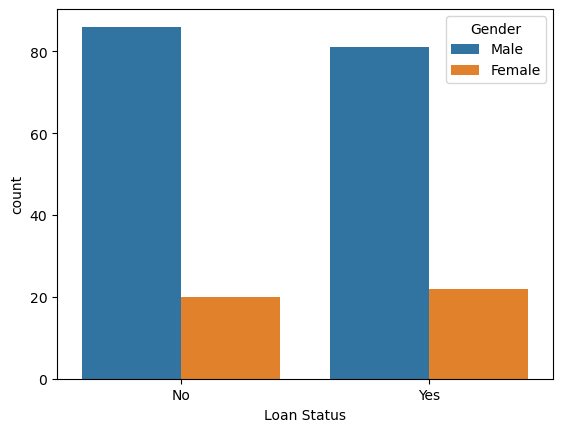

In [16]:
sns.countplot(df_train['Loan Status'],hue=df_train['Gender'])

In [17]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Mortgage Due',
       'Loan Amount', 'Property_Area', 'Property Value', 'Purpose', 'JOB',
       'No.of Years in Job', 'No.of Credit enquires', 'No.of credit Lines',
       'Debit to Income ratio', 'Loan term in Months', 'Loan Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

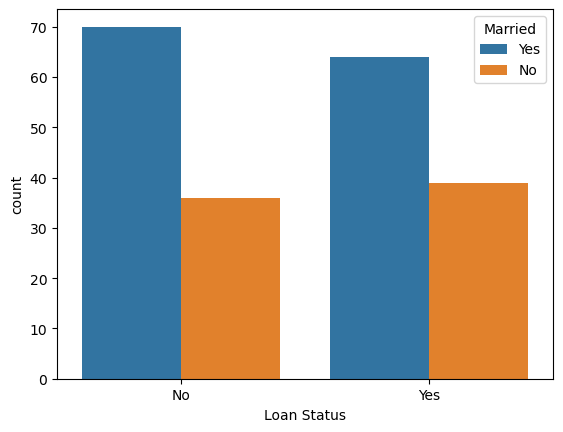

In [18]:
sns.countplot(df_train['Loan Status'],hue=df_train['Married'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

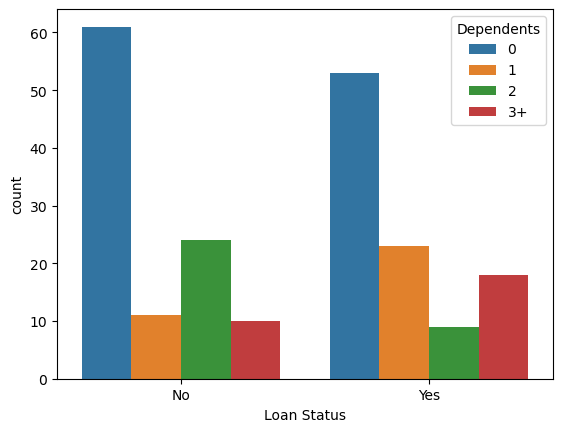

In [19]:
sns.countplot(df_train['Loan Status'],hue=df_train['Dependents'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

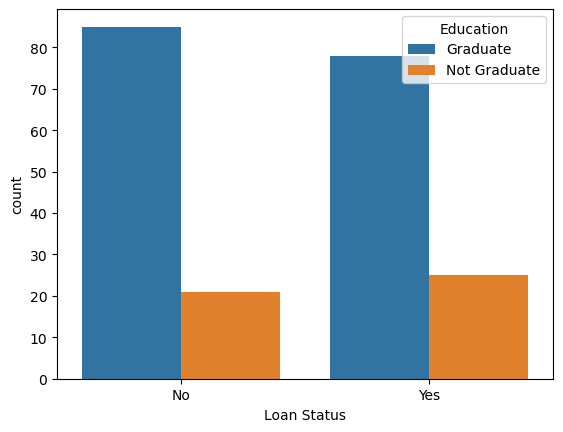

In [20]:
sns.countplot(df_train['Loan Status'],hue=df_train['Education'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

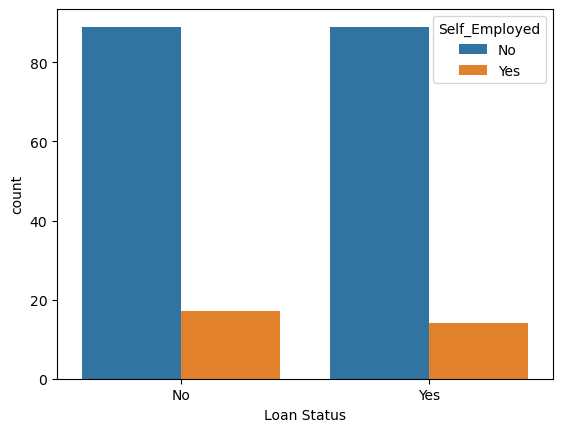

In [21]:
sns.countplot(df_train['Loan Status'],hue=df_train['Self_Employed'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

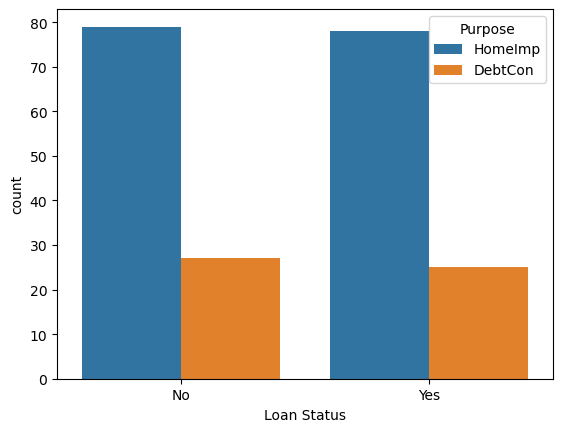

In [22]:
sns.countplot(df_train['Loan Status'],hue=df_train['Purpose'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

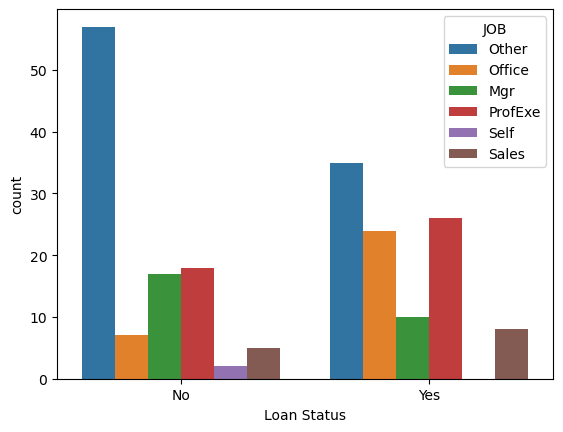

In [23]:
sns.countplot(df_train['Loan Status'],hue=df_train['JOB'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

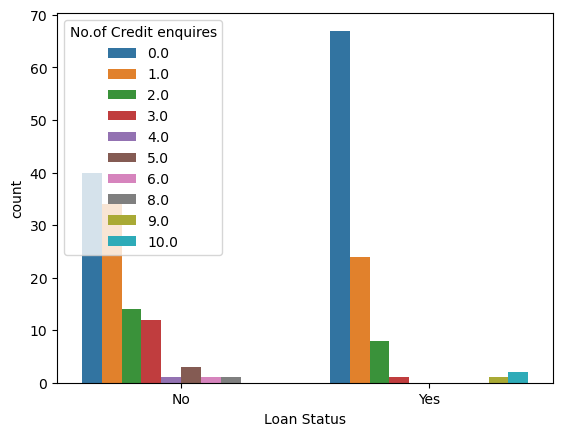

In [24]:
sns.countplot(df_train['Loan Status'],hue=df_train['No.of Credit enquires'])

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

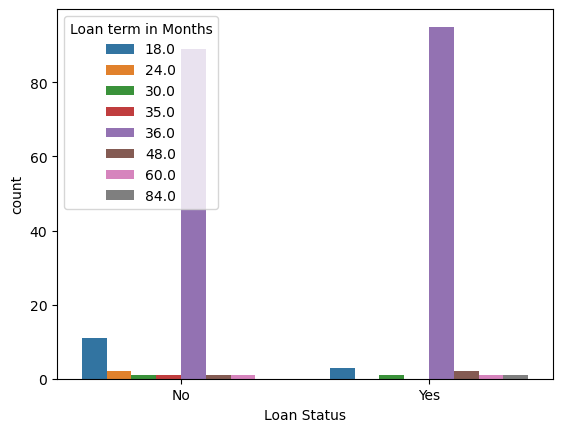

In [25]:
sns.countplot(df_train['Loan Status'],hue=df_train[ 'Loan term in Months'])

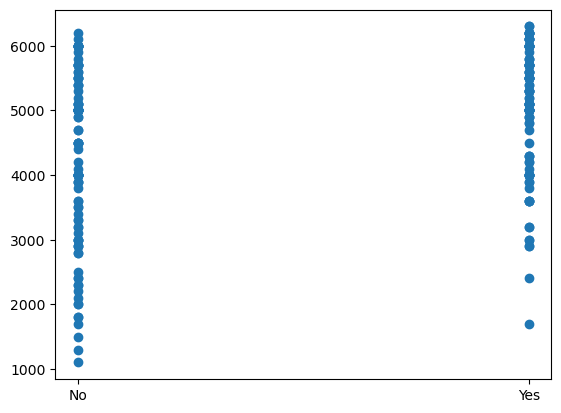

In [26]:
plt.scatter(df_train['Loan Status'],df_train['Loan Amount'])

In [27]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_train)
#profile

In [28]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
0,LP001015,Male,Yes,0,Graduate,No,5849.0,0.0,25860.0,1100,Urban,39025.0,HomeImp,Other,10.5,1.0,9.0,1104.421269,36.0,No
1,LP001022,Male,Yes,1,Graduate,No,4583.0,1508.0,70053.0,1300,Rural,68400.0,HomeImp,Other,7.0,0.0,14.0,2823.285403,36.0,No
2,LP001031,Male,Yes,2,Graduate,Yes,3000.0,0.0,13500.0,1500,Urban,16700.0,HomeImp,Other,4.0,1.0,10.0,1504.500000,36.0,No
3,LP001051,Male,No,0,Not Graduate,No,6000.0,0.0,97800.0,1700,Urban,112000.0,HomeImp,Office,3.0,0.0,14.0,1716.300000,36.0,Yes
4,LP001054,Male,Yes,0,Not Graduate,Yes,5417.0,4196.0,30548.0,1700,Urban,40320.0,HomeImp,Other,9.0,1.0,8.0,5901.639284,36.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LP002932,Male,Yes,3+,Graduate,No,3813.0,0.0,73881.0,6200,Urban,98550.0,HomeImp,Other,0.0,0.0,31.0,6219.376082,36.0,Yes
205,LP002962,Male,No,0,Graduate,No,5167.0,3167.0,133882.0,6200,Semiurban,155222.0,HomeImp,ProfExe,9.0,0.0,19.0,9392.910973,36.0,Yes
206,LP002965,Female,Yes,0,Graduate,No,4723.0,0.0,75623.0,6200,Semiurban,89634.0,HomeImp,Other,24.0,0.0,47.0,6216.011645,36.0,Yes
207,LP002971,Male,Yes,3+,Not Graduate,No,4750.0,2333.0,99469.0,6300,Urban,116260.0,HomeImp,Office,23.0,1.0,12.0,8653.940842,36.0,Yes


In [29]:
df_train.Married.value_counts()

Yes    134
No      75
Name: Married, dtype: int64

([<matplotlib.patches.Wedge at 0x1becd57ab50>,
 [Text(0.4719448260179557, 0.9936136478505525, 'single'),
  Text(-0.47194482601795607, -0.9936136478505524, 'married')])

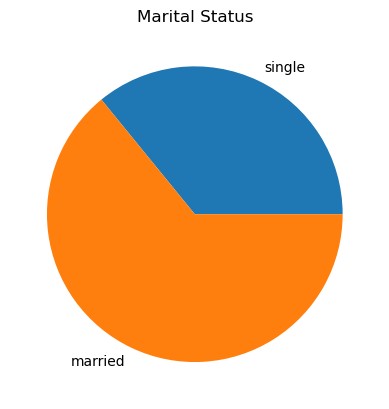

In [30]:
label=['single','married']
plt.title("Marital Status")
plt.pie(df_train.groupby(df_train["Married"]).size(),labels=label)

([<matplotlib.patches.Wedge at 0x1becd5c89a0>,
 [Text(0.8879708990840048, 0.6492362300272099, 'Male'),
  Text(-0.887970899084005, -0.6492362300272098, 'Female')])

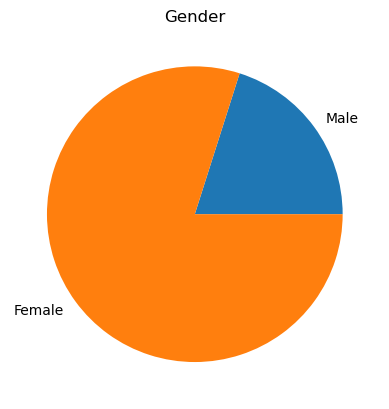

In [31]:
label=['Male','Female']
plt.title("Gender")
plt.pie(df_train.groupby(df_train["Gender"]).size(),labels=label)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline

In [33]:
encoder = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
class data_process(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(x,y):
        return self
    def transform(self,x):
        x['Gender'] = encoder.fit_transform(x.Gender)
        x['Married'] = encoder.fit_transform(x.Married)
        x['Dependents'] = encoder.fit_transform(x.Married)
        x['Self_Employed'] = encoder.fit_transform(x.Married)
        x['Purpose'] = encoder.fit_transform(x.Purpose)
        x['JOB'] = encoder.fit_transform(x.JOB)
        x['Education'] = encoder.fit_transform(x.Education)
        x['Property_Area'] = encoder.fit_transform(x.Property_Area)
        x['Loan Status'] = encoder.fit_transform(x['Loan Status'] )
        
        x['ApplicantIncome'] = scaler.fit_transform(np.array(x.ApplicantIncome).reshape(-1,1))
        x['CoapplicantIncome'] = scaler.fit_transform(np.array(x.CoapplicantIncome).reshape(-1,1))


        return x

In [35]:
data_pipeline = Pipeline([
    ('Data_preprocessing',data_process())
])
df = data_pipeline.transform(df_train)

In [36]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
0,LP001015,1,1,1,0,1,0.169130,0.000000,25860.0,1100,2,39025.0,1,2,10.5,1.0,9.0,1104.421269,36.0,0
1,LP001022,1,1,1,0,1,0.131559,0.133451,70053.0,1300,0,68400.0,1,2,7.0,0.0,14.0,2823.285403,36.0,0
2,LP001031,1,1,1,0,1,0.084580,0.000000,13500.0,1500,2,16700.0,1,2,4.0,1.0,10.0,1504.500000,36.0,0
3,LP001051,1,0,0,1,0,0.173611,0.000000,97800.0,1700,2,112000.0,1,1,3.0,0.0,14.0,1716.300000,36.0,1
4,LP001054,1,1,1,1,1,0.156309,0.371327,30548.0,1700,2,40320.0,1,2,9.0,1.0,8.0,5901.639284,36.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LP002932,1,1,1,0,1,0.108707,0.000000,73881.0,6200,2,98550.0,1,2,0.0,0.0,31.0,6219.376082,36.0,1
205,LP002962,1,0,0,0,0,0.148890,0.280265,133882.0,6200,1,155222.0,1,3,9.0,0.0,19.0,9392.910973,36.0,1
206,LP002965,0,1,1,0,1,0.135713,0.000000,75623.0,6200,1,89634.0,1,2,24.0,0.0,47.0,6216.011645,36.0,1
207,LP002971,1,1,1,1,1,0.136515,0.206460,99469.0,6300,2,116260.0,1,1,23.0,1.0,12.0,8653.940842,36.0,1


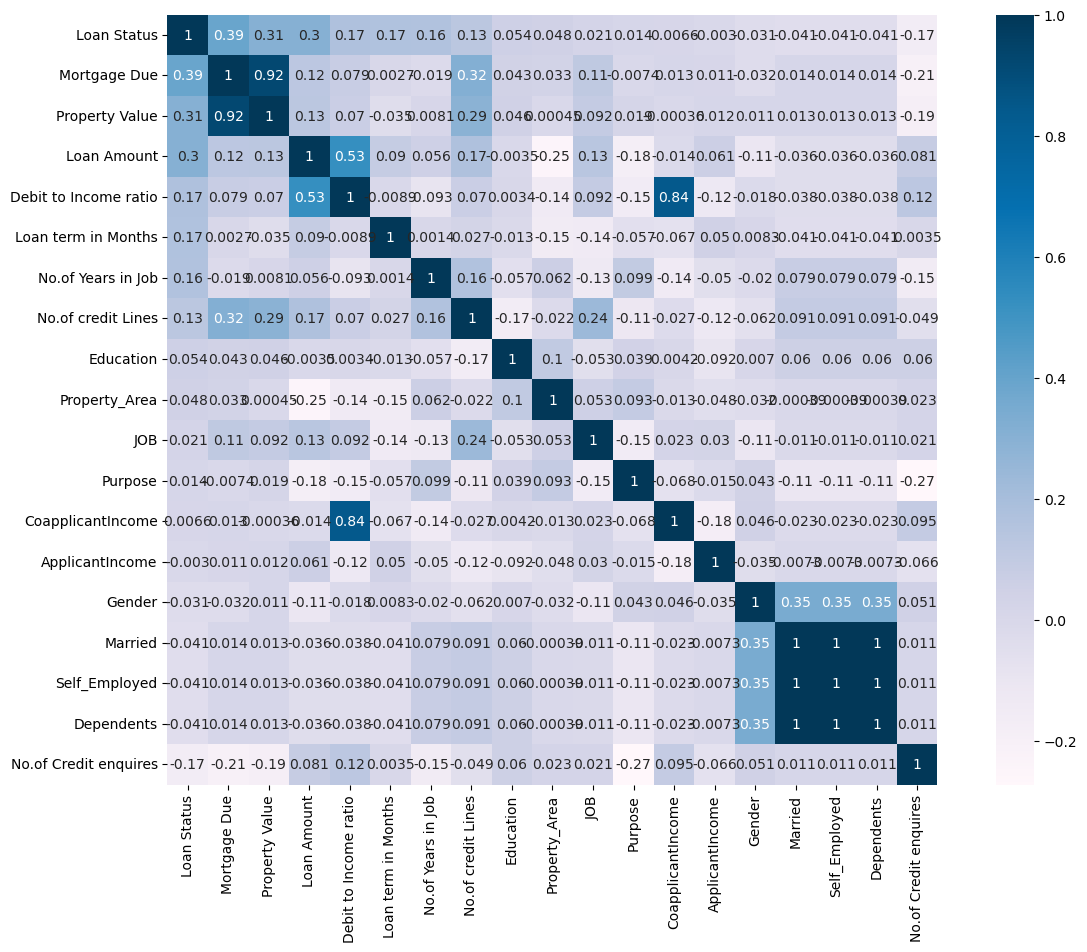

In [37]:
corr_data = df[df.keys()]
colormap = plt.cm.PuBu
cols = corr_data.corr().nlargest(len(df.keys()),'Loan Status')['Loan Status'].index
cm = np.corrcoef(df[cols].values.T)
plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(cm,square=True,annot=True,cmap=colormap,xticklabels=cols.values,yticklabels=cols.values)

AxesSubplot(0.125,0.11;0.775x0.77)


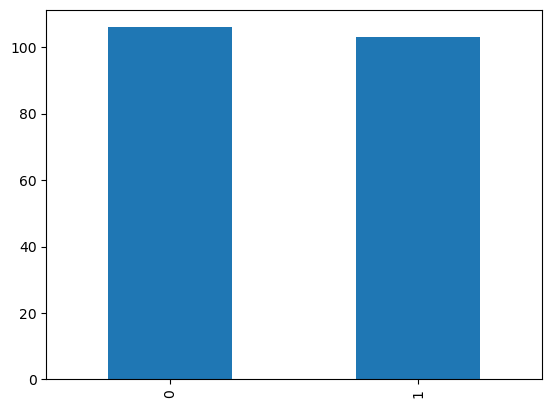

In [38]:
xy = df['Loan Status'].value_counts().plot(kind='bar')
print(xy)

In [39]:
df_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Mortgage Due,Loan Amount,Property_Area,Property Value,Purpose,JOB,No.of Years in Job,No.of Credit enquires,No.of credit Lines,Debit to Income ratio,Loan term in Months,Loan Status
Gender,1.000000,0.346718,0.346718,0.007033,0.346718,-0.035153,0.045690,-0.031867,-0.107074,-0.031947,0.011491,0.042816,-0.106530,-0.019996,0.050572,-0.062009,-0.018298,0.008251,-0.031082
Married,0.346718,1.000000,1.000000,0.060364,1.000000,-0.007271,-0.022955,0.013586,-0.035897,-0.000388,0.012907,-0.107529,-0.011157,0.079336,0.011484,0.090670,-0.038280,-0.040800,-0.040668
Dependents,0.346718,1.000000,1.000000,0.060364,1.000000,-0.007271,-0.022955,0.013586,-0.035897,-0.000388,0.012907,-0.107529,-0.011157,0.079336,0.011484,0.090670,-0.038280,-0.040800,-0.040668
Education,0.007033,0.060364,0.060364,1.000000,0.060364,-0.092117,0.004158,0.043207,-0.003542,0.101598,0.046089,0.038600,-0.052723,-0.056551,0.059901,-0.165075,0.003356,-0.013351,0.053825
Self_Employed,0.346718,1.000000,1.000000,0.060364,1.000000,-0.007271,-0.022955,0.013586,-0.035897,-0.000388,0.012907,-0.107529,-0.011157,0.079336,0.011484,0.090670,-0.038280,-0.040800,-0.040668
ApplicantIncome,-0.035153,-0.007271,-0.007271,-0.092117,-0.007271,1.000000,-0.177244,0.010778,0.061409,-0.048174,0.011864,-0.015308,0.030446,-0.049644,-0.065738,-0.122687,-0.120905,0.049867,-0.003023
CoapplicantIncome,0.045690,-0.022955,-0.022955,0.004158,-0.022955,-0.177244,1.000000,0.013191,-0.014266,-0.012626,-0.000364,-0.067925,0.023092,-0.143052,0.094555,-0.027117,0.843302,-0.067260,0.006649
Mortgage Due,-0.031867,0.013586,0.013586,0.043207,0.013586,0.010778,0.013191,1.000000,0.121096,0.033339,0.920576,-0.007374,0.111549,-0.019205,-0.207475,0.316345,0.079308,0.002696,0.391449
Loan Amount,-0.107074,-0.035897,-0.035897,-0.003542,-0.035897,0.061409,-0.014266,0.121096,1.000000,-0.245562,0.126704,-0.179700,0.133570,0.055581,0.081294,0.171090,0.525269,0.090045,0.304767
Property_Area,-0.031947,-0.000388,-0.000388,0.101598,-0.000388,-0.048174,-0.012626,0.033339,-0.245562,1.000000,0.000449,0.093207,0.053484,0.062146,0.023090,-0.022280,-0.143234,-0.151120,0.047677


In [40]:
x = df.drop('Loan Status',axis=1)
feat =['Mortgage Due','Property Value','Loan Amount','ApplicantIncome','JOB','No.of Years in Job',
      'Debit to Income ratio', 'No.of Credit enquires', 'No.of credit Lines' ]
x= x[feat]
y = df_train['Loan Status']

In [41]:
feat =['Mortgage Due','Property Value','Loan Amount','ApplicantIncome','JOB','No.of Years in Job',
      'Debit to Income ratio', 'No.of Credit enquires', 'No.of credit Lines' ]
x= x[feat]

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size = 0.3, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [44]:
# classify function
from sklearn.model_selection import cross_val_score
# from sklearn.model_sc
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 24)
    model.fit(X_train, y_train)
    


In [45]:
total_instances = len(X_train) + len(X_test)
train_percent = (len(X_train) / total_instances) * 100
test_percent = (len(X_test) / total_instances) * 100

print(f"Training Set Percentage: {train_percent:.2f}%")
print(f"Testing Set Percentage: {test_percent:.2f}%")

Training Set Percentage: 29.67%
Testing Set Percentage: 70.33%


In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)
lg1 =model

In [47]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
classify(model, x, y)
dc=model

In [48]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)
rf = model

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [50]:

# KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

In [51]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
lg = grid_log_reg.best_estimator_

In [52]:
# DecisionTree Classifier, and best estimator
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_params = {"n_estimators":[10,100],"criterion":["gini","entropy","log_loss"],
                 "max_features":["sqrt","auto","log"],
                }

grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
grid_forest.fit(X_train, y_train)
rforest_clf = grid_forest.best_estimator_

In [54]:
from sklearn.metrics import classification_report
    
classes = ['class 0: no', 'class 1: yes']
print('Decision Tree Classifier:')
y_pred_tree = dc.predict(X_test)
print(classification_report(y_test, y_pred_tree, target_names=classes))

print('Random Forest Classifier:')
y_pred_forest =rf.predict(X_test)
print(classification_report(y_test, y_pred_forest,target_names=classes))

print('KNears Neighbors:')
y_pred_knear = knears_neighbors.predict(X_test)
print(classification_report(y_test, y_pred_knear,target_names=classes))

print('Logistic Regression:')
y_pred_log_reg = lg1.predict(X_test)
print(classification_report(y_test, y_pred_log_reg, target_names=classes))

Decision Tree Classifier:
              precision    recall  f1-score   support

 class 0: no       0.99      0.96      0.97        78
class 1: yes       0.96      0.99      0.97        69

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147

Random Forest Classifier:
              precision    recall  f1-score   support

 class 0: no       0.96      0.99      0.97        78
class 1: yes       0.99      0.96      0.97        69

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147

KNears Neighbors:
              precision    recall  f1-score   support

 class 0: no       0.85      0.58      0.69        78
class 1: yes       0.65      0.88      0.75        69

    accuracy                           0.72       147
   macro avg       0.75      0.73      0.72       147
weig

In [55]:
model

RandomForestClassifier()

In [56]:
rfc=RandomForestClassifier(max_depth=5,n_estimators=21 ,random_state=1)
rfc.fit(X_train,y_train)
ypred=rfc.predict(X_test)

<AxesSubplot:>

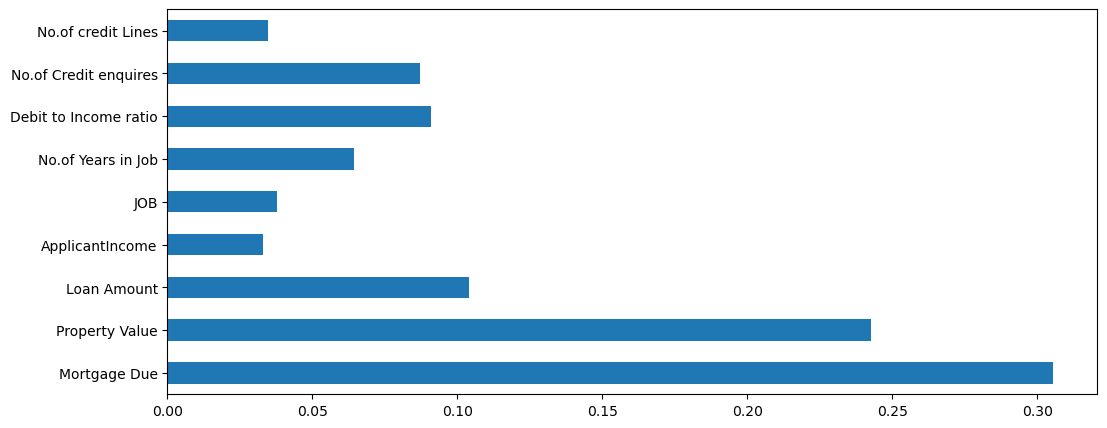

In [57]:
importances=pd.Series(rfc.feature_importances_, index=x.columns)
importances.plot(kind='barh',figsize=(12,5))

In [58]:
input_data = (25860.0, 3902555.0, 110,0.169130,2,10.5,110442.126859,1.0,9.0)#0

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('not eligible')
else:
  print('eligible')

[0]
not eligible


In [59]:
import pickle
filename = 'loan_model.sav'
pickle.dump(model, open(filename, 'wb'))